In [1]:
import os
# Disable oneDNN custom operations to prevent the TensorFlow warning about floating-point round-off errors.
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import layers
from keras.models import Model
from keras.models import load_model
from stacked_mnist_tf import DataMode, StackedMNISTData
from autoencoder import Autoencoder, plot_comparisons
from variational_autoencoder import VariationalAutoencoder
from verification_net import VerificationNet

In [2]:
batch_size = 2048

Batch has size: Images: (2048, 28, 28, 3); Labels (2048,)


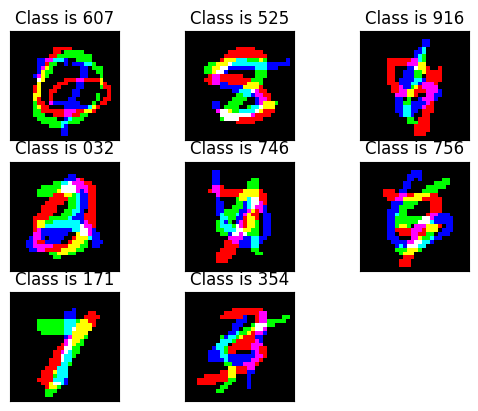

In [3]:
gen = StackedMNISTData(mode=DataMode.COLOR_BINARY_MISSING, default_batch_size=9)
imgTest, clsTest = gen.get_random_batch(batch_size=8)
clsTest = clsTest // 10

img, labels = gen.get_random_batch(training=False, batch_size=batch_size)
labels = labels // 10
print(f"Batch has size: Images: {img.shape}; Labels {labels.shape}")

gen.plot_example(images=imgTest, labels=clsTest)


encoded.shape (None, 4)
encoded.shape (24, 4)


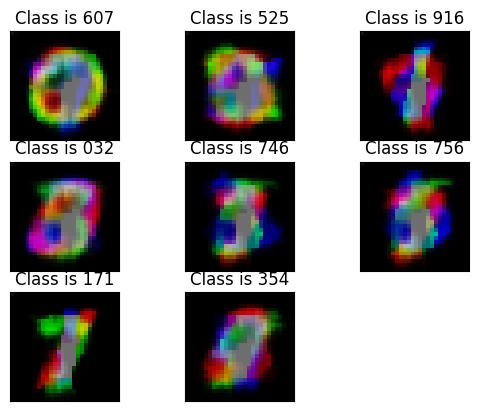

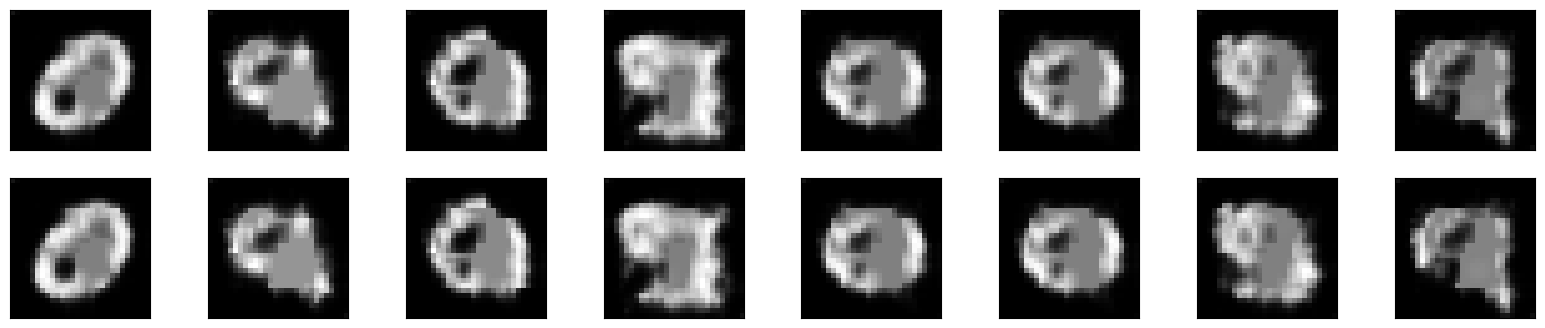

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "conv2d_12" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (32, 28, 28, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 28, 28, 3), dtype=int32)
  • training=None
  • mask=None

In [7]:
AE = load_model('models/autoencoderWorking.keras', custom_objects={'Autoencoder': Autoencoder})

reconstructed_imgs = AE.predictRGB(imgTest)
generated_imgs = AE.generate_images()
gen.plot_example(images=reconstructed_imgs, labels=clsTest)
plot_comparisons(generated_imgs, generated_imgs)
